In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [4]:
df=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [8]:
dataset=pd.DataFrame(df.data,columns=df.feature_names)

In [9]:
dataset["Price"]=df.target

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor=LinearRegression()

In [14]:
from sklearn.model_selection import cross_val_score

In [16]:
mse=cross_val_score(regressor,X,y,scoring="neg_mean_squared_error",cv=5)

In [17]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
np.mean(mse)

-37.131807467699055

In [19]:
#ridge regression
from sklearn.linear_model import Ridge

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
ridge=Ridge()

In [22]:
ridge

Ridge()

In [24]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,40,50]}

In [25]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)

In [26]:
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error')

In [27]:
ridge_regressor.best_params_

{'alpha': 50}

In [28]:
ridge_regressor.best_score_

-30.770000796597618

In [29]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,40,50]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+03, tolerance: 3.307e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error')

In [30]:
lasso_regressor.best_params_

{'alpha': 1}

In [31]:
lasso_regressor.best_score_

-35.531580220694856

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [34]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [35]:
import seaborn as sns

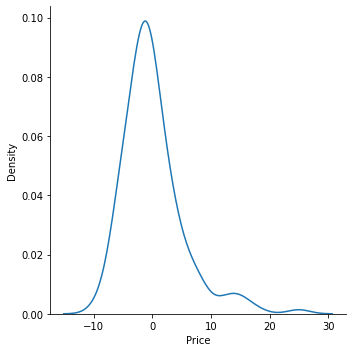

In [37]:
sns.displot(y_test-prediction_lasso,kind="kde")

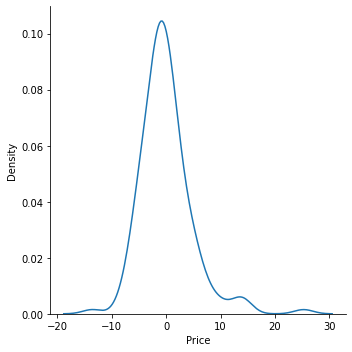

In [38]:
sns.displot(y_test-prediction_ridge,kind="kde")

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test,prediction_lasso)

0.7033764611711535

In [41]:
r2_score(y_test,prediction_ridge)

0.7486864865324733

In [42]:
#elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
en=ElasticNet()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,40,50]}
en_regressor=GridSearchCV(en,parameters,scoring="neg_mean_squared_error",cv=5)
en_regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.872e+03, tolerance: 3.919e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.031e+03, tolerance: 3.307e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error')

In [43]:
prediction_en=en_regressor.predict(X_test)

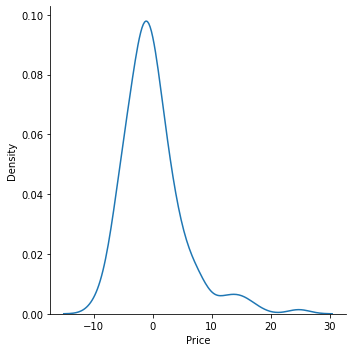

In [44]:
sns.displot(y_test-prediction_en,kind="kde")

In [45]:
r2_score(y_test,prediction_en)

0.7068910532630666

In [46]:
lasso_regressor.best_params_

{'alpha': 1}